<a href="https://colab.research.google.com/github/mzamarron/MachineLearning/blob/main/Kmeans%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> K-means ++</center>

```
K-means categorize instances of a dataset into different clusters according to its attributes.
K-means ++ guarantees a more intelligent centroid inicialization.
```

***

**Algorithm**
1. Take one center $c_1$, chosen uniformly at random from $X$.
2. Take a new center $c_i$, choosing $x \in X$ with probability $\frac{D(x)^2}{\sum_{x \in X} D(x)^2}$
3. Repeat Step 2 until we have taken $k$ centers altogether.
4. Proceed as with the standard k-means algorithm.

  
  

***

## Library Import

In [ ]:
import random
import statistics
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from itertools import permutations 
import warnings
warnings.filterwarnings("ignore")

## Data import

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MachineLearning/Datasets/Mall_Customers.csv')

## Data exploration

In [ ]:
print('Dataset dimension: ', df.shape)
df.head()

Dataset dimension:  (200, 6)


,CustomerID,Genre,Age,AnnualIncome,SpendingScore,CustomerType
0,1,Male,19,15,39,1
1,3,Female,20,16,6,1
2,5,Female,31,17,40,1
3,7,Female,35,18,6,1
4,9,Male,64,19,3,1


In [ ]:
# Check for invalid data
df.isna().sum()

CustomerID       0
Genre            0
Age              0
AnnualIncome     0
SpendingScore    0
CustomerType     0
dtype: int64

In [ ]:
# Dataset description
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,CustomerType
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,3.470000
std,57.879185,13.969007,26.264721,25.823522,1.459366
min,1.000000,18.000000,15.000000,1.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000,2.000000
50%,100.500000,36.000000,61.500000,50.000000,4.000000
75%,150.250000,49.000000,78.000000,73.000000,5.000000
max,200.000000,70.000000,137.000000,99.000000,5.000000


```
The aim is to cluster the customers based on the relevant features of annual income and spending score.
```

In [ ]:
X = df.iloc[:, [3, 4]].values # Corresponds to "AnnualIncome" & "Spending Score"
y = df.iloc[:,-1:].values # Corresponds to "CustomerType"

## Data visualization

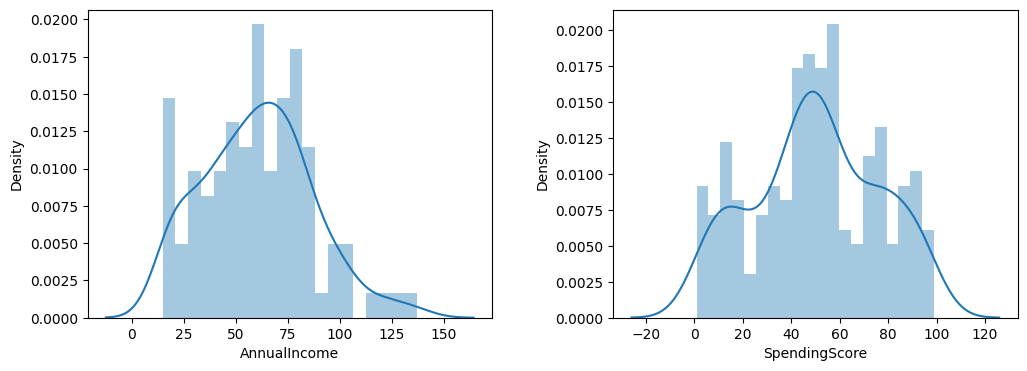

In [ ]:
# Distribution of attributes
attributes = ['AnnualIncome', "SpendingScore"]
aux = 1 

plt.figure(1 , figsize = (12 , 4))
for i in attributes:
    plt.subplot(1, 2, aux)
    plt.subplots_adjust(wspace = 0.3)
    sns.distplot(df[i], bins=20, kde = True)
    aux += 1
plt.show()

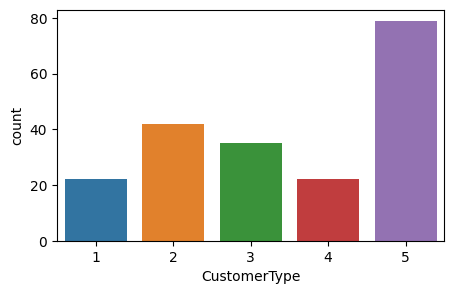

In [ ]:
# Class balance
plt.figure(figsize=(5,3))
g = sns.countplot(x=df['CustomerType'])
plt.show()

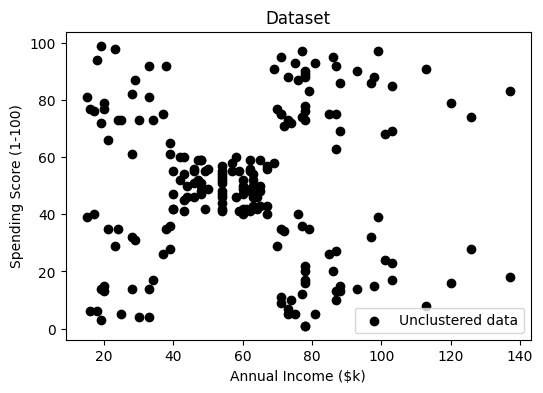

In [ ]:
# Dataset visualization
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c='black',label='Unclustered data')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Dataset')
plt.show()

## Optimal number of clusters

```
Elbow method
```
> * Plot the cost function's value produced by different k.
* The optimal # of clusters is the k where diminishing returns are no longer worth the additional cost.
* **WSS** is the cost function to identify the sum of squared distances between points to the centroid of the nearest cluster.

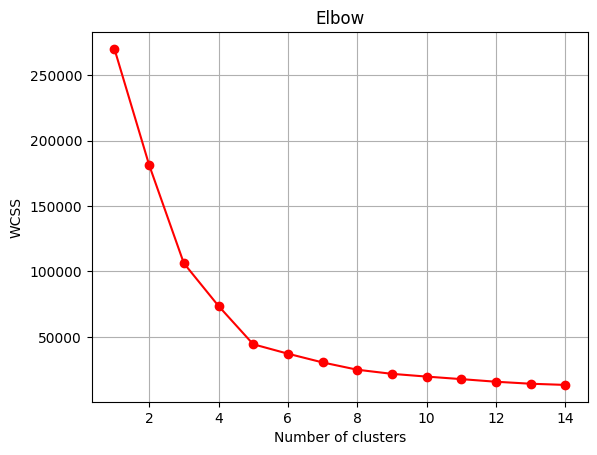

In [ ]:
wcss = []
for i in range(1, 15):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow')
plt.grid()
plt.show()

The elbow can be found, approximately, where the number of clusters is equal to 5. 
Therefore, K = 5.

# Fitting algorithm with scikitlearn

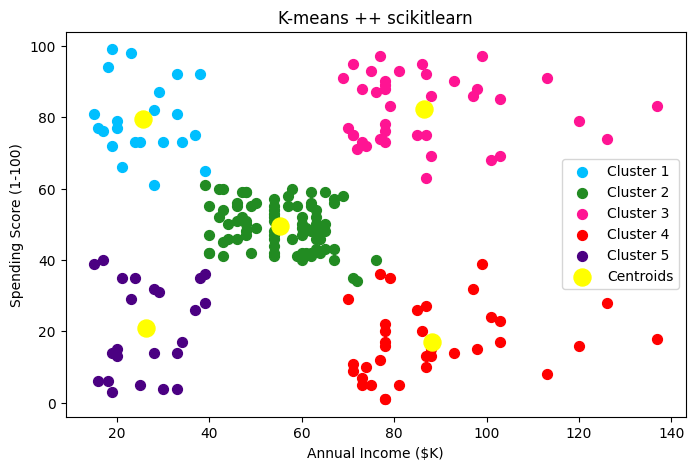

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualización
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'deepskyblue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'forestgreen', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'deeppink', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'red', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'indigo', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('K-means ++ scikitlearn')
plt.xlabel('Annual Income ($K)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

We can observe that there are five clusters:

1. Clients with low income and a low number of transactions.
2. Clients with low income but with a high number of transactions.
3. Clients with medium income and a medium number of transactions.
4. Clients with high income and a low number of transactions.
5. Clients with high income and a high number of transactions.



# Fitting own algorithm

In [ ]:
class Kmeans_pp:
  # Initialization -------------------------------------------------------------
  def __init__(self,X,K):
    self.X = X                #Input data
    self.Output = {}          #Dictionary for visual management
    self.Centroides = np.array([]).reshape(self.X.shape[1],0) #Centroids
    self.K = K                # K clusters
    self.m = self.X.shape[0]  #
  #-----------------------------------------------------------------------------

  # K-means ++ -----------------------------------------------------------------
  def kmeanspp(self, X, K):
    # STEP 1. Randomly select first centroid and add it to the centroid matrix.
    i = random.randint(0, X.shape[0]-1)
    C = np.array([X[i]])
    # STEP 2. Calculate euclidian distance between centroids, add the minimum to  
    # a matrix Distance (D).
    for k in range(1, K):
        D = np.array([]) 
        for x in X:
            D = np.append(D, np.min(np.sum((x-C)**2)))
    # STEP 3. Calculate probability of choosing the nearest point as the next 
    # centroid by dividing matrix D with the sum of matrix D.
        prob = D/np.sum(D)
    # STEP 4. Calculate the cumulative probability distribution.
        cummulative_prob = np.cumsum(prob)
    # STEP 5. Select a random number, if the index is higher, assign it.
        r = random.random()
        i = 0
        for j,p in enumerate(cummulative_prob):
            if r < p:
                i = j
                break
        C = np.append(C, [X[i]], axis=0)
    return C.T
  #-----------------------------------------------------------------------------

  # Training -------------------------------------------------------------------
  def fit(self,max_iter):
    # Centroid initialization
    self.Centroids = self.kmeanspp(self.X, self.K) 
    # Calculation of Euclidean distances and Clusters assignment
    for n in range(max_iter):
        Euclidian_dist = np.array([]).reshape(self.m,0)
        for k in range(self.K):
            d = np.sum((self.X-self.Centroids[:,k])**2,axis=1)
            Euclidian_dist = np.c_[Euclidian_dist, d]
        C = np.argmin(Euclidian_dist, axis=1)+1
        # Centroid readjustment
        O = {}
        for k in range(self.K):
            O[k+1] = np.array([]).reshape(2,0)
        for i in range(self.m):
            O[C[i]] = np.c_[O[C[i]],self.X[i]]    
        for k in range(self.K):
            O[k+1] = O[k+1].T
        for k in range(self.K):
            self.Centroids[:,k]=np.mean(O[k+1],axis=0)  
        self.Output = O  
  #-----------------------------------------------------------------------------

  # Prediction -----------------------------------------------------------------
  def predict(self):
    return self.Output, self.Centroids.T
  #-----------------------------------------------------------------------------

In [ ]:
def Visualization(K, Output, Centroids):   
  color=['deepskyblue','forestgreen','deeppink','red','indigo']
  labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']
  plt.figure(figsize=(8,5))

  for k in range(K):
      plt.scatter(Output[k+1][:,0], Output[k+1][:,1], c=color[k], label=labels[k])
      
  plt.scatter(Centroids[:,0], Centroids[:,1], s=150, c='yellow', marker='o', label='Centroids')
  plt.title('K-means ++')
  plt.xlabel('Annual Income ($K)')
  plt.ylabel('Spending Score (1-100)')
  plt.legend()
  plt.show()

## K-means ++ implementation

In [ ]:
K = 5 # Number of clusters
max_iter = 50 # Stop criteria

In [ ]:
kmeans = Kmeans_pp(X,K)
kmeans.fit(max_iter)
Output, Centroids = kmeans.predict()

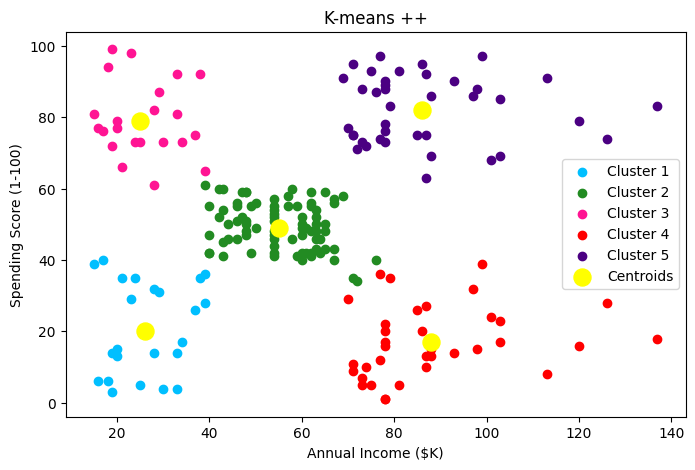

In [ ]:
Visualization(K, Output, Centroids)

# K-means ++ vs K-means centroids

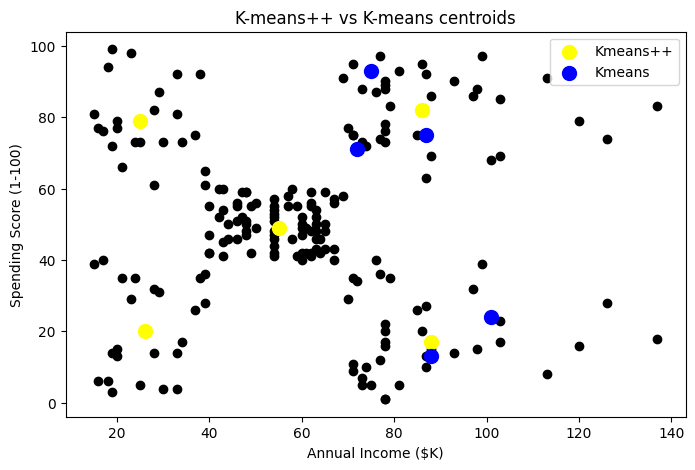

In [ ]:
# Random initialization: K-means------------------------------------------------
Centroids_rand=np.array([]).reshape(2,0)
for i in range(K):
    rand=random.randint(0,X.shape[0]-1)
    Centroids_rand=np.c_[Centroids_rand,X[rand]]
# ------------------------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1], color='black')
plt.scatter(Centroids[:,0], Centroids[:,1], s=100,color='yellow', marker='o', label='Kmeans++')
plt.scatter(Centroids_rand[0,:],Centroids_rand[1,:], s=100, marker='o', color='blue', label='Kmeans')
plt.title('K-means++ vs K-means centroids')
plt.xlabel('Annual Income ($K)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()